Importing the dependencies

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import zscore

from pathlib import Path
COUNTRY = "sierraleone"
CLEAN_DIR = "../data"
CLEAN_CSV = f"{CLEAN_DIR}/{COUNTRY}_clean.csv"
SAVE_FIGS = False  # set True to also save figures to disk
FIG_DIR = "figs"

Path(CLEAN_DIR).mkdir(parents=True, exist_ok=True)
if SAVE_FIGS:
    Path(FIG_DIR).mkdir(parents=True, exist_ok=True)

loading the data

In [11]:
# Load the benin data
df = pd.read_csv(r"C:\Users\hanif\Desktop\New folder\nifomohad-solar-challenge-week0\data\sierraleone-bumbuna.csv")
print("Dataset shape:", df.shape)

Dataset shape: (525600, 19)


# 1 Summary Statistics & Missing-Value Report

In [13]:
print("An overview of the dataset: the shape of the dataset")
df.info()

An overview of the dataset: the shape of the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600

In [15]:
print("Missing Value Report:")
print(df.isnull().sum())

Missing Value Report:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [17]:
#list any column with >5% nulls
print(f"Columns with > 5% nulls: {[col for col in df.columns if df[col].isnull().sum()/len(df) > 0.05]}")

Columns with > 5% nulls: ['Comments']


In [29]:
print("Summary for numeric columns with transposes the output:")
display(df.describe(include=[np.number]).T)

Summary for numeric columns with transposes the output:


,count,mean,std,min,25%,50%,75%,max
GHI,525600.0,201.957515,298.495150,-19.5,-2.8,0.3,362.4,1499.0
DNI,525600.0,116.376337,218.652659,-7.8,-0.3,-0.1,107.0,946.0
DHI,525600.0,113.720571,158.946032,-17.9,-3.8,-0.1,224.7,892.0
ModA,525600.0,206.643095,300.896893,0.0,0.0,3.6,359.5,1507.0
ModB,525600.0,198.114691,288.889073,0.0,0.0,3.4,345.4,1473.0
Tamb,525600.0,26.319394,4.398605,12.3,23.1,25.3,29.4,39.9
RH,525600.0,79.448857,20.520775,9.9,68.7,85.4,96.7,100.0
WS,525600.0,1.146113,1.239248,0.0,0.0,0.8,2.0,19.2
WSgust,525600.0,1.691606,1.617053,0.0,0.0,1.6,2.6,23.9
WSstdev,525600.0,0.363823,0.295000,0.0,0.0,0.4,0.6,4.1


In [21]:
# Missing values
missing_counts = df.isna().sum().sort_values(ascending=False)
percentage_missing_values = (missing_counts/len(df)*100).round(2)
display(pd.DataFrame({'Missing_count': missing_counts, 'missing %': percentage_missing_values}))

# Columns with >5% nulls
cols_over_5percent_null = percentage_missing_values[percentage_missing_values> 5]
print("Columns with > 5% nulls:", cols_over_5percent_null.to_string())


,Missing_count,missing %
Comments,525600,100.0
WSstdev,0,0.0
TModB,0,0.0
TModA,0,0.0
Precipitation,0,0.0
Cleaning,0,0.0
BP,0,0.0
WDstdev,0,0.0
WD,0,0.0
Timestamp,0,0.0


Columns with > 5% nulls: Comments    100.0


# 2 Outlier Detection & Basic Cleaning

In [31]:
# Check outliers for selected columns for Z-score analysis
z_scores = df[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']].apply(zscore)
outliers = (z_scores.abs() > 3).sum()  # Count outliers
print("Z>|3| outliers per column:\n", outliers)

# Copy for cleaning
dfc = df.copy()

# Median impute numeric columns
num_cols = [c for c in dfc.columns if c not in ['Timestamp','Comments']]
for c in num_cols:
    if dfc[c].isna().any():
        dfc[c] = dfc[c].fillna(dfc[c].median())
        
# Floor non negatives for irradiance‑like fields
for c in ['GHI','DNI','DHI','ModA','ModB','Precipitation']:
    if c in dfc.columns:
        dfc[c] = dfc[c].clip(lower=0)

# Export cleaned CSV
dfc.to_csv(CLEAN_CSV, index=False)
print('Wrote cleaned file →', CLEAN_CSV)


Z>|3| outliers per column:
 GHI       2477
DNI       7586
DHI       2986
ModA      1604
ModB      2041
WS        3967
WSgust    3665
dtype: int64
Wrote cleaned file → ../data/sierraleone_clean.csv


# 3 Time Series Analysis

In [38]:
# Convert to datetime and set index
if 'Timestamp' in df.columns:
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
    df = df.set_index('Timestamp')
elif 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df = df.set_index('Date')

# Confirm index type
print(df.index)
print(type(df.index))


DatetimeIndex(['2021-10-30 00:01:00', '2021-10-30 00:02:00',
               '2021-10-30 00:03:00', '2021-10-30 00:04:00',
               '2021-10-30 00:05:00', '2021-10-30 00:06:00',
               '2021-10-30 00:07:00', '2021-10-30 00:08:00',
               '2021-10-30 00:09:00', '2021-10-30 00:10:00',
               ...
               '2022-10-29 23:51:00', '2022-10-29 23:52:00',
               '2022-10-29 23:53:00', '2022-10-29 23:54:00',
               '2022-10-29 23:55:00', '2022-10-29 23:56:00',
               '2022-10-29 23:57:00', '2022-10-29 23:58:00',
               '2022-10-29 23:59:00', '2022-10-30 00:00:00'],
              dtype='datetime64[ns]', name='Timestamp', length=525600, freq=None)
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


Time Series Analysis

 Basic Time Series Plots


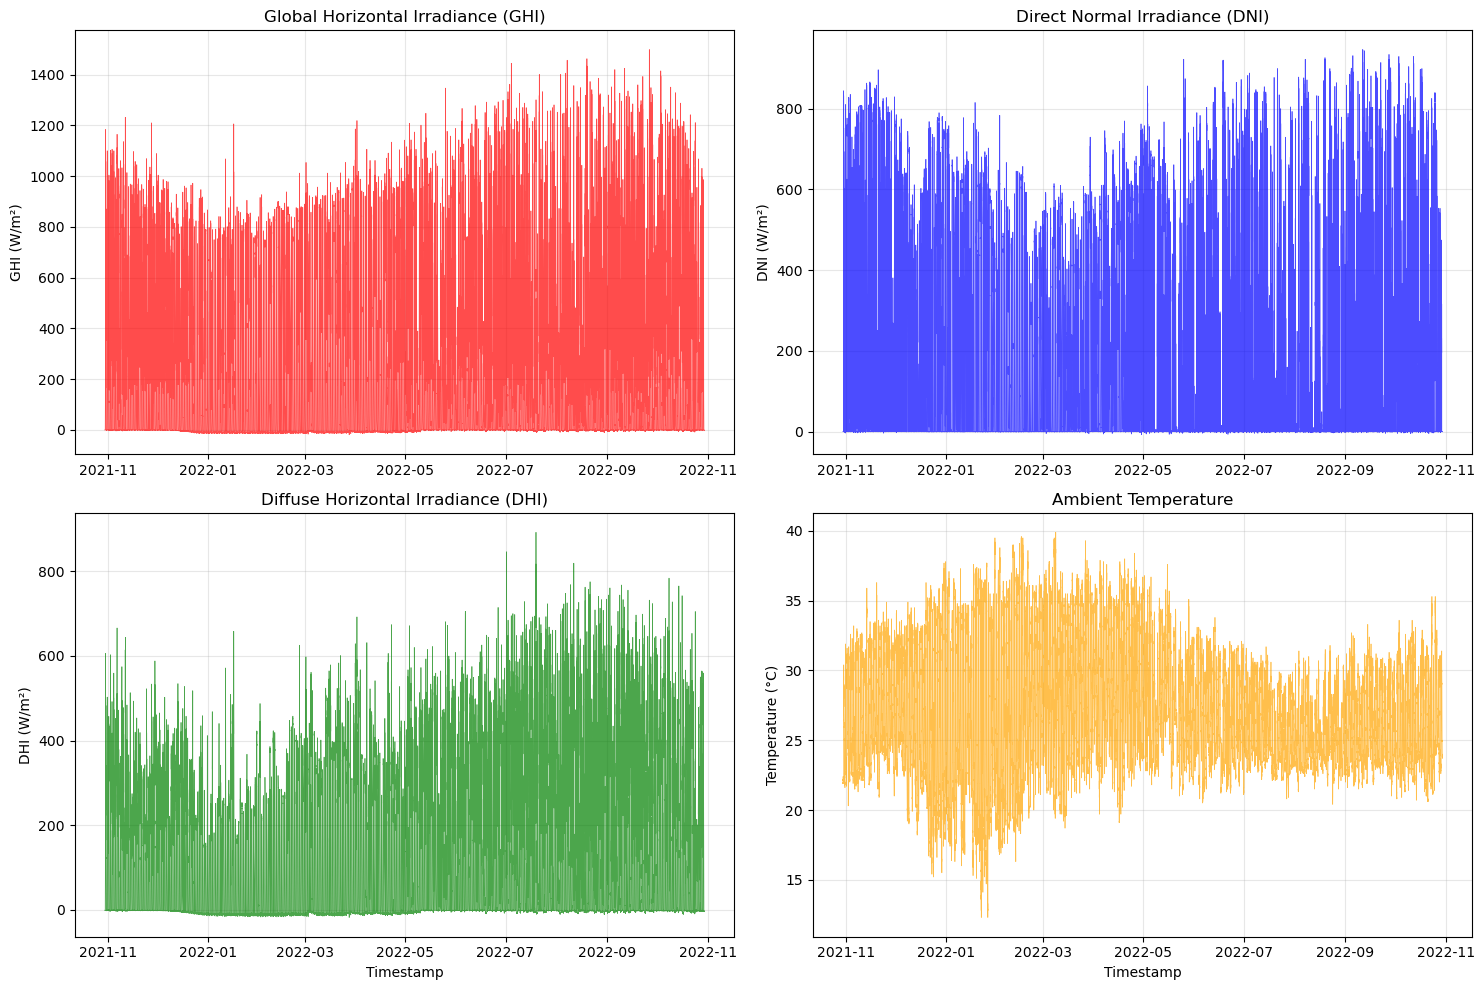


 Hourly Patterns


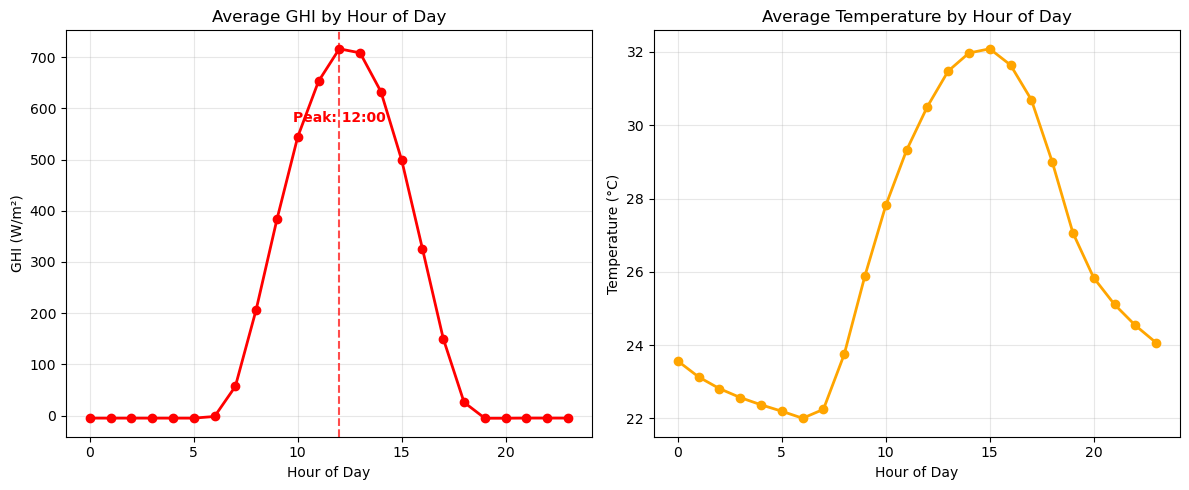


 Monthly Patterns


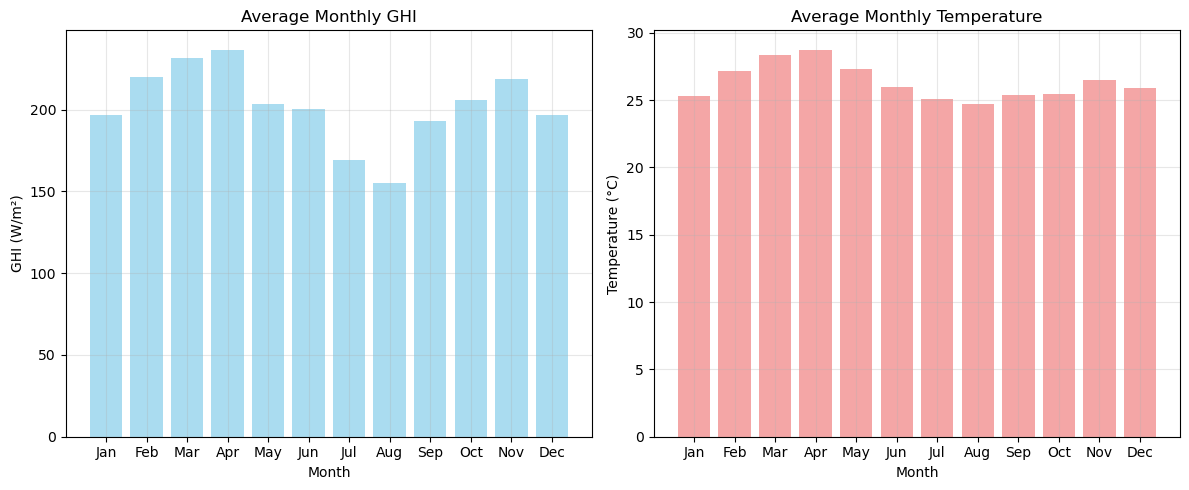


 Anomaly Detection


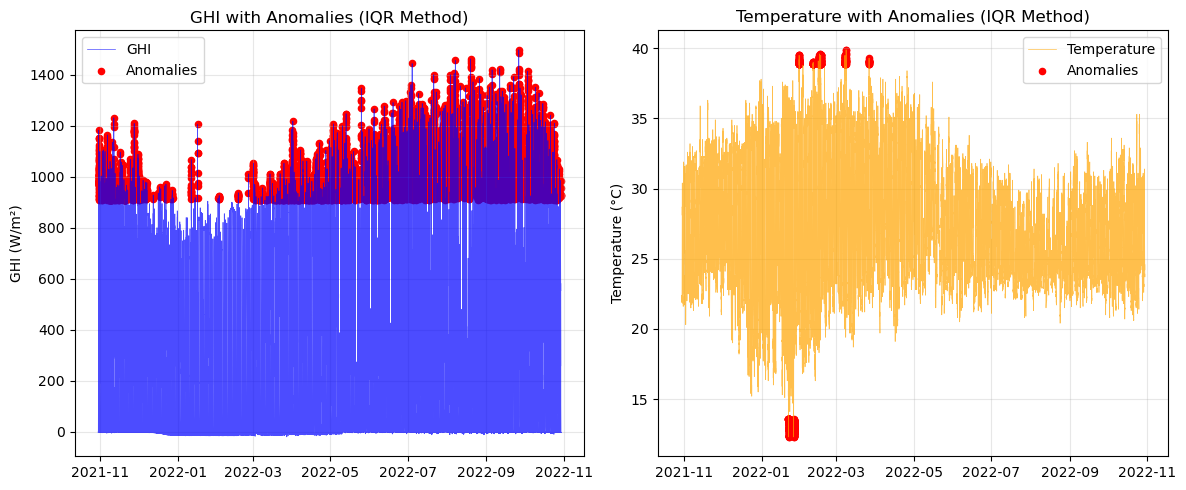

Solar Radiation Summary:
• Peak generation hour: 12:00
• Average GHI: 202 W/m²
• Maximum GHI: 1499 W/m²
• GHI anomalies found: 15853

Temprature Pattern:
• Average temperature: 26.3°C
• Temperature range: 12.3°C to 39.9°C
• Temperature anomalies found: 652


In [40]:
# Time Series Analysis
print("Time Series Analysis")
# Basic line chart
print("\n Basic Time Series Plots")
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
# Plot GHI
if 'GHI' in df.columns:
    ax1.plot(df.index, df['GHI'], linewidth=0.5, alpha=0.7, color='red')
    ax1.set_title('Global Horizontal Irradiance (GHI)')
    ax1.set_ylabel('GHI (W/m²)')
    ax1.grid(True, alpha=0.3)
# Plot DNI
if 'DNI' in df.columns:
    ax2.plot(df.index, df['DNI'], linewidth=0.5, alpha=0.7, color='blue')
    ax2.set_title('Direct Normal Irradiance (DNI)')
    ax2.set_ylabel('DNI (W/m²)')
    ax2.grid(True, alpha=0.3)
# Plot DHI
if 'DHI' in df.columns:
    ax3.plot(df.index, df['DHI'], linewidth=0.5, alpha=0.7, color='green')
    ax3.set_title('Diffuse Horizontal Irradiance (DHI)')
    ax3.set_ylabel('DHI (W/m²)')
    ax3.set_xlabel('Timestamp')
    ax3.grid(True, alpha=0.3)
# Plot Temperature
if 'Tamb' in df.columns:
    ax4.plot(df.index, df['Tamb'], linewidth=0.5, alpha=0.7, color='orange')
    ax4.set_title('Ambient Temperature')
    ax4.set_ylabel('Temperature (°C)')
    ax4.set_xlabel('Timestamp')
    ax4.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Hourly patterns 
print("\n Hourly Patterns")
# Add hour column for analysis
df['Hour'] = df.index.hour
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
# Average GHI by hour
if 'GHI' in df.columns:
    hourly_ghi = df.groupby('Hour')['GHI'].mean()
    ax1.plot(hourly_ghi.index, hourly_ghi.values, marker='o', linewidth=2, color='red')
    ax1.set_title('Average GHI by Hour of Day')
    ax1.set_xlabel('Hour of Day')
    ax1.set_ylabel('GHI (W/m²)')
    ax1.grid(True, alpha=0.3)
    # Mark peak hour
    peak_hour = hourly_ghi.idxmax()
    ax1.axvline(x=peak_hour, color='red', linestyle='--', alpha=0.7)
    ax1.text(peak_hour, hourly_ghi.max()*0.8, f'Peak: {peak_hour}:00', 
            ha='center', color='red', fontweight='bold')
# Average Temperature by hour
if 'Tamb' in df.columns:
    hourly_temp = df.groupby('Hour')['Tamb'].mean()
    ax2.plot(hourly_temp.index, hourly_temp.values, marker='o', linewidth=2, color='orange')
    ax2.set_title('Average Temperature by Hour of Day')
    ax2.set_xlabel('Hour of Day')
    ax2.set_ylabel('Temperature (°C)')
    ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# Monthly Patterns
print("\n Monthly Patterns")
# Add month column
df['Month'] = df.index.month
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
# Monthly average GHI
if 'GHI' in df.columns:
    monthly_ghi = df.groupby('Month')['GHI'].mean()
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    ax1.bar(monthly_ghi.index, monthly_ghi.values, color='skyblue', alpha=0.7)
    ax1.set_title('Average Monthly GHI')
    ax1.set_xlabel('Month')
    ax1.set_ylabel('GHI (W/m²)')
    ax1.set_xticks(range(1, 13))
    ax1.set_xticklabels(months)
    ax1.grid(True, alpha=0.3)
# Monthly average Temperature
if 'Tamb' in df.columns:
    monthly_temp = df.groupby('Month')['Tamb'].mean()
    ax2.bar(monthly_temp.index, monthly_temp.values, color='lightcoral', alpha=0.7)
    ax2.set_title('Average Monthly Temperature')
    ax2.set_xlabel('Month')
    ax2.set_ylabel('Temperature (°C)')
    ax2.set_xticks(range(1, 13))
    ax2.set_xticklabels(months)
    ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# Anomaly Detection
print("\n Anomaly Detection")
# Use IQR method for anomaly detection (simple and effective)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
# GHI Anomalies
if 'GHI' in df.columns:
    Q1_ghi = df['GHI'].quantile(0.25)
    Q3_ghi = df['GHI'].quantile(0.75)
    IQR_ghi = Q3_ghi - Q1_ghi
    lower_ghi = Q1_ghi - 1.5 * IQR_ghi
    upper_ghi = Q3_ghi + 1.5 * IQR_ghi
    ghi_anomalies = (df['GHI'] < lower_ghi) | (df['GHI'] > upper_ghi)
    
    ax1.plot(df.index, df['GHI'], linewidth=0.5, alpha=0.7, color='blue', label='GHI')
    ax1.scatter(df.index[ghi_anomalies], df['GHI'][ghi_anomalies], 
               color='red', s=20, label='Anomalies')
    ax1.set_title('GHI with Anomalies (IQR Method)')
    ax1.set_ylabel('GHI (W/m²)')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
# Temperature Anomalies
if 'Tamb' in df.columns:
    Q1_temp = df['Tamb'].quantile(0.25)
    Q3_temp = df['Tamb'].quantile(0.75)
    IQR_temp = Q3_temp - Q1_temp
    lower_temp = Q1_temp - 1.5 * IQR_temp
    upper_temp = Q3_temp + 1.5 * IQR_temp
    temp_anomalies = (df['Tamb'] < lower_temp) | (df['Tamb'] > upper_temp)
    ax2.plot(df.index, df['Tamb'], linewidth=0.5, alpha=0.7, color='orange', label='Temperature')
    ax2.scatter(df.index[temp_anomalies], df['Tamb'][temp_anomalies], 
               color='red', s=20, label='Anomalies')
    ax2.set_title('Temperature with Anomalies (IQR Method)')
    ax2.set_ylabel('Temperature (°C)')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary
if 'GHI' in df.columns:
    print("Solar Radiation Summary:")
    peak_hour = df.groupby('Hour')['GHI'].mean().idxmax()
    avg_ghi = df['GHI'].mean()
    max_ghi = df['GHI'].max()
    print(f"• Peak generation hour: {peak_hour}:00")
    print(f"• Average GHI: {avg_ghi:.0f} W/m²")
    print(f"• Maximum GHI: {max_ghi:.0f} W/m²")
    print(f"• GHI anomalies found: {ghi_anomalies.sum()}")

if 'Tamb' in df.columns:
    print("\nTemprature Pattern:")
    avg_temp = df['Tamb'].mean()
    max_temp = df['Tamb'].max()
    min_temp = df['Tamb'].min()
    print(f"• Average temperature: {avg_temp:.1f}°C")
    print(f"• Temperature range: {min_temp:.1f}°C to {max_temp:.1f}°C")
    print(f"• Temperature anomalies found: {temp_anomalies.sum()}")

# 4 Cleaning Impact (ModA/ModB by Cleaning flag)

,ModA,ModB
Cleaning,,
0,206.578599,198.038150
1,273.309252,277.231102


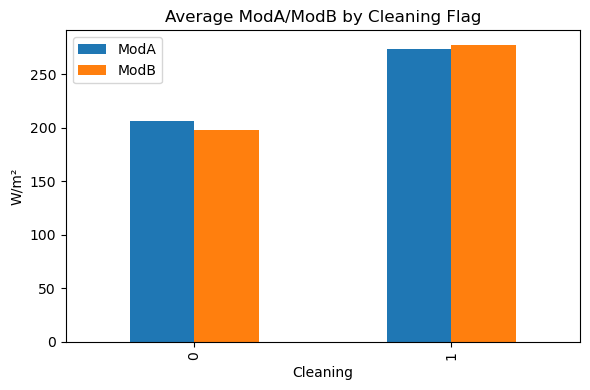

In [42]:
if 'Cleaning' in dfc.columns and dfc['Cleaning'].nunique() > 1:
      grp = dfc.groupby('Cleaning')[[c for c in ['ModA','ModB'] if c in dfc.columns]].mean()
      display(grp)
      grp.plot(kind='bar', figsize=(6,4))
      plt.title('Average ModA/ModB by Cleaning Flag'); plt.ylabel('W/m²'); plt.tight_layout()
      if SAVE_FIGS: plt.savefig(Path(FIG_DIR)/'cleaning_impact_mods.png', dpi=150)
      plt.show()
else:
      print('Cleaning flag not available or has a single value — skipping pre/post analysis.')

# 5. Correlation & Relationship Analysis

,GHI,DNI,DHI,TModA,TModB,Tamb,RH,WS,WSgust
GHI,1.000000,0.939963,0.968423,0.848736,0.843713,0.658875,-0.551436,0.432182,0.465374
DNI,0.939963,1.000000,0.878845,0.828797,0.826583,0.655478,-0.588501,0.404621,0.433768
DHI,0.968423,0.878845,1.000000,0.817057,0.811802,0.626183,-0.507655,0.414517,0.446757
TModA,0.848736,0.828797,0.817057,1.000000,0.998067,0.914587,-0.658609,0.530990,0.559711
TModB,0.843713,0.826583,0.811802,0.998067,1.000000,0.923070,-0.663987,0.537689,0.565689
Tamb,0.658875,0.655478,0.626183,0.914587,0.923070,1.000000,-0.743328,0.578806,0.596594
RH,-0.551436,-0.588501,-0.507655,-0.658609,-0.663987,-0.743328,1.000000,-0.519805,-0.528676
WS,0.432182,0.404621,0.414517,0.530990,0.537689,0.578806,-0.519805,1.000000,0.984040
WSgust,0.465374,0.433768,0.446757,0.559711,0.565689,0.596594,-0.528676,0.984040,1.000000


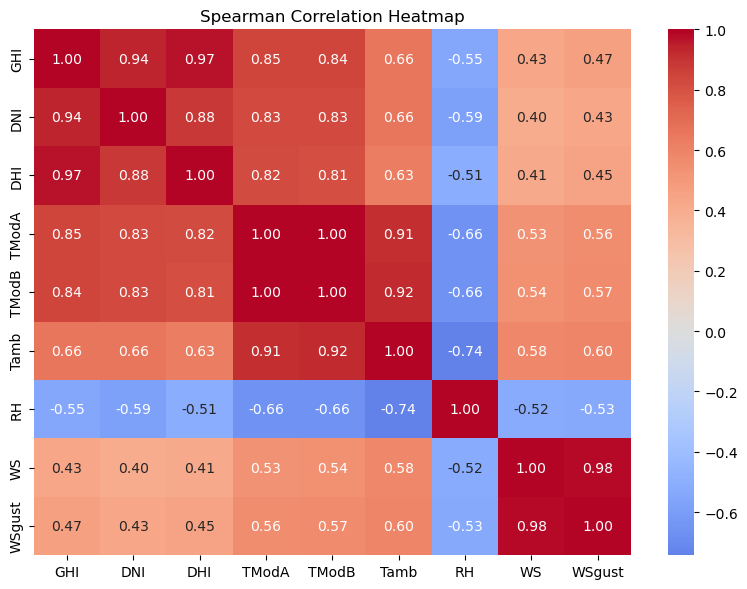

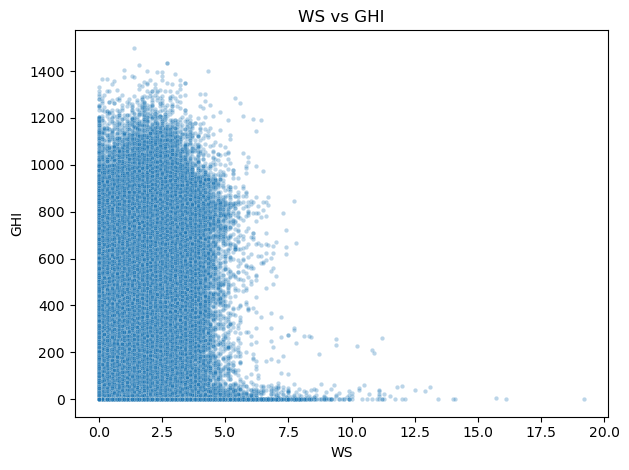

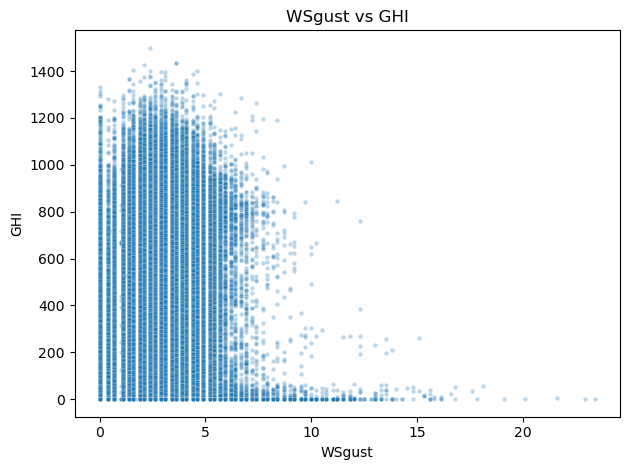

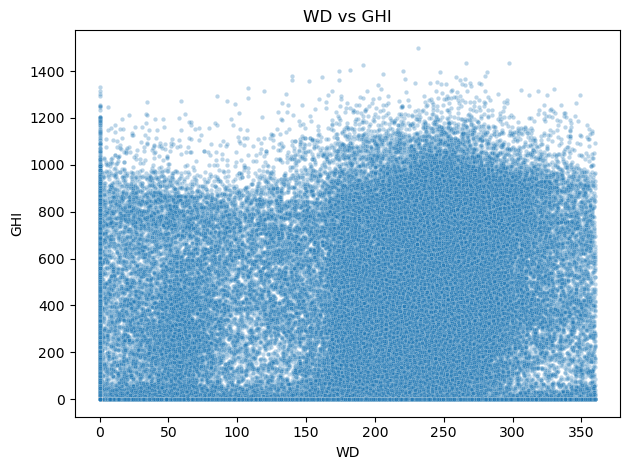

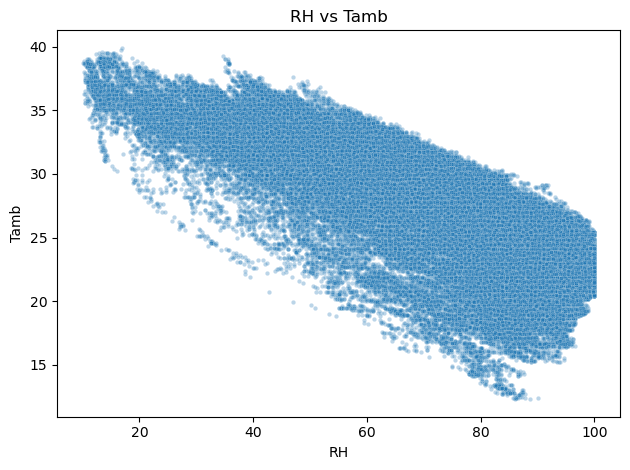

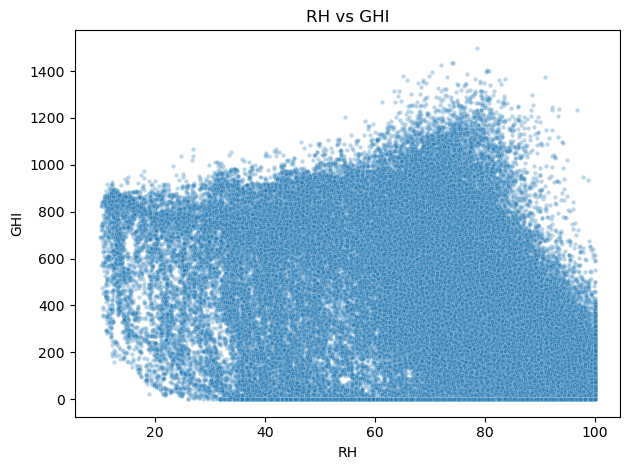

In [44]:
corr_cols = [c for c in ['GHI','DNI','DHI','TModA','TModB','Tamb','RH','WS','WSgust'] if c in dfc.columns]
if len(corr_cols) >= 2:
    corr = dfc[corr_cols].corr(method='spearman')
    display(corr)
    plt.figure(figsize=(8,6))
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
    plt.title('Spearman Correlation Heatmap'); plt.tight_layout()
    #if SAVE_FIGS: plt.savefig(Path(FIG_DIR)/'correlation_heatmap.png', dpi=150)
    plt.show()
    # Downsample for scatter plots to keep it fast
sample = dfc.sample(n=min(200000, len(dfc)), random_state=42) if len(dfc) > 200000 else dfc

if all(c in sample.columns for c in ['WS','GHI']):
    sns.scatterplot(data=sample, x='WS', y='GHI', s=10, alpha=0.3)
    plt.title('WS vs GHI'); plt.tight_layout();
    if SAVE_FIGS: plt.savefig(Path(FIG_DIR)/'scatter_WS_GHI.png', dpi=150)
    plt.show()
if all(c in sample.columns for c in ['WSgust','GHI']):
    sns.scatterplot(data=sample, x='WSgust', y='GHI', s=10, alpha=0.3)
    plt.title('WSgust vs GHI'); plt.tight_layout();
    if SAVE_FIGS: plt.savefig(Path(FIG_DIR)/'scatter_WSgust_GHI.png', dpi=150)
    plt.show()
if all(c in sample.columns for c in ['WD','GHI']):
    sns.scatterplot(data=sample, x='WD', y='GHI', s=10, alpha=0.3)
    plt.title('WD vs GHI'); plt.tight_layout();
    if SAVE_FIGS: plt.savefig(Path(FIG_DIR)/'scatter_WD_GHI.png', dpi=150)
    plt.show()
if all(c in sample.columns for c in ['RH','Tamb']):
    sns.scatterplot(data=sample, x='RH', y='Tamb', s=10, alpha=0.3)
    plt.title('RH vs Tamb'); plt.tight_layout();
    if SAVE_FIGS: plt.savefig(Path(FIG_DIR)/'scatter_RH_Tamb.png', dpi=150)
    plt.show()
    
if all(c in sample.columns for c in ['RH','GHI']):
    sns.scatterplot(data=sample, x='RH', y='GHI', s=10, alpha=0.3)
    plt.title('RH vs GHI'); plt.tight_layout();
    if SAVE_FIGS: plt.savefig(Path(FIG_DIR)/'scatter_RH_GHI.png', dpi=150)
    plt.show()

# 6 Wind & Distribution Analysis

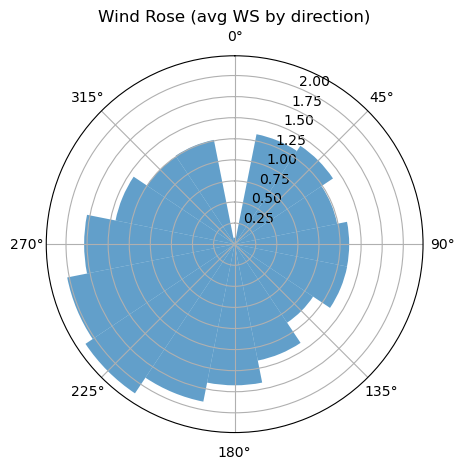

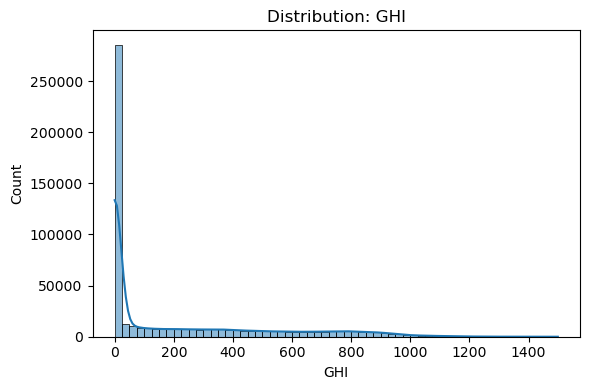

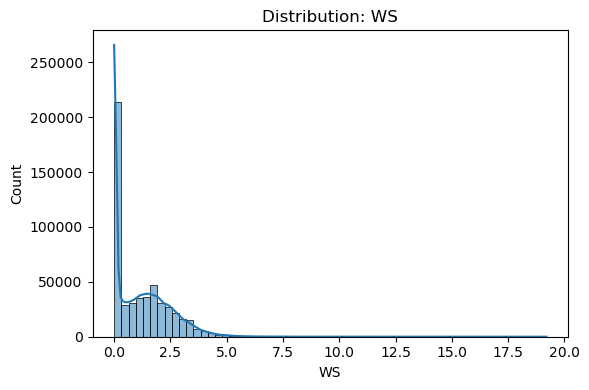

In [45]:
# Wind rose — 16 sectors
if all(c in dfc.columns for c in ['WD','WS']):
    import numpy as np
    wd = dfc['WD'].dropna().values % 360
    ws = dfc['WS'].dropna().values
    if len(wd) and len(ws):
        bins = np.linspace(0,360,17)
        sectors = np.digitize(wd, bins) - 1
        sectors[sectors==16] = 0
        mean_ws = pd.DataFrame({'sector': sectors, 'ws': ws}).groupby('sector')['ws'].mean().reindex(range(16)).fillna(0)
        theta = np.deg2rad(np.linspace(0,360,16,endpoint=False))
        width = 2*np.pi/16
        ax = plt.subplot(111, polar=True)
        ax.bar(theta, mean_ws.values, width=width, bottom=0.0, alpha=0.7)
        ax.set_theta_zero_location('N'); ax.set_theta_direction(-1)
        ax.set_title('Wind Rose (avg WS by direction)'); plt.tight_layout()
        if SAVE_FIGS: plt.savefig(Path(FIG_DIR)/'wind_rose.png', dpi=150)
        plt.show()

# Histograms
for c in [c for c in ['GHI','WS'] if c in dfc.columns]:
    plt.figure(figsize=(6,4))
    sns.histplot(dfc[c], bins=60, kde=True)
    plt.title(f'Distribution: {c}'); plt.tight_layout()
    #if SAVE_FIGS: plt.savefig(Path(FIG_DIR)/f'hist_{c}.png', dpi=150)
    plt.show()

# 7 Temperature Analysis

Spearman rho(GHI, Tamb) = 0.659
Spearman rho(GHI, RH) = -0.551
Spearman rho(Tamb, RH) = -0.743


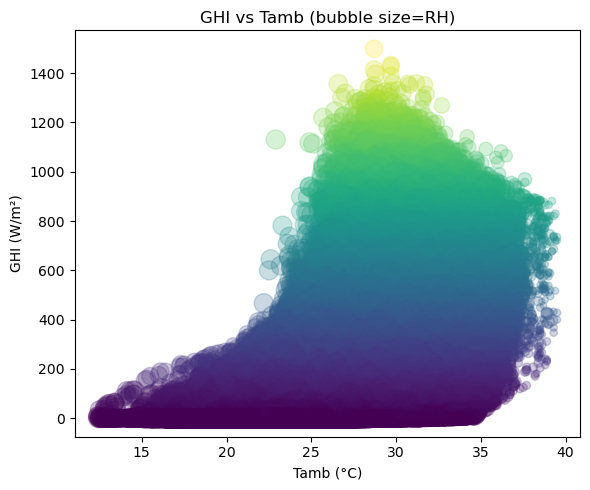

In [47]:
# Correlation readouts
for a,b in [('GHI','Tamb'),('GHI','RH'),('Tamb','RH')]:
    if a in dfc.columns and b in dfc.columns:
        rho = dfc[[a,b]].corr(method='spearman').iloc[0,1]
        print(f"Spearman rho({a}, {b}) = {rho:.3f}")

# Bubble: GHI vs Tamb (bubble size = RH or BP)
if all(c in dfc.columns for c in ['GHI','Tamb']):
    size_col = 'RH' if 'RH' in dfc.columns else ('BP' if 'BP' in dfc.columns else None)
    plt.figure(figsize=(6,5))
    plot_df = dfc.sample(n=min(120000, len(dfc)), random_state=7) if len(dfc)>120000 else dfc
    if size_col:
        s = plot_df[size_col]
        # Normalize bubble size
        sizes = 20 + 180*(s - s.min())/(s.max()-s.min() + 1e-9)
        plt.scatter(plot_df['Tamb'], plot_df['GHI'], s=sizes, alpha=0.25, c=plot_df['GHI'], cmap='viridis')
        plt.title(f'GHI vs Tamb (bubble size={size_col})')
    else:
        plt.scatter(plot_df['Tamb'], plot_df['GHI'], s=20, alpha=0.25)
        plt.title('GHI vs Tamb')
    plt.xlabel('Tamb (°C)'); plt.ylabel('GHI (W/m²)'); plt.tight_layout()
    if SAVE_FIGS: plt.savefig(Path(FIG_DIR)/'bubble_GHI_Tamb.png', dpi=150)
    plt.show()

# 8 Bubble Chart

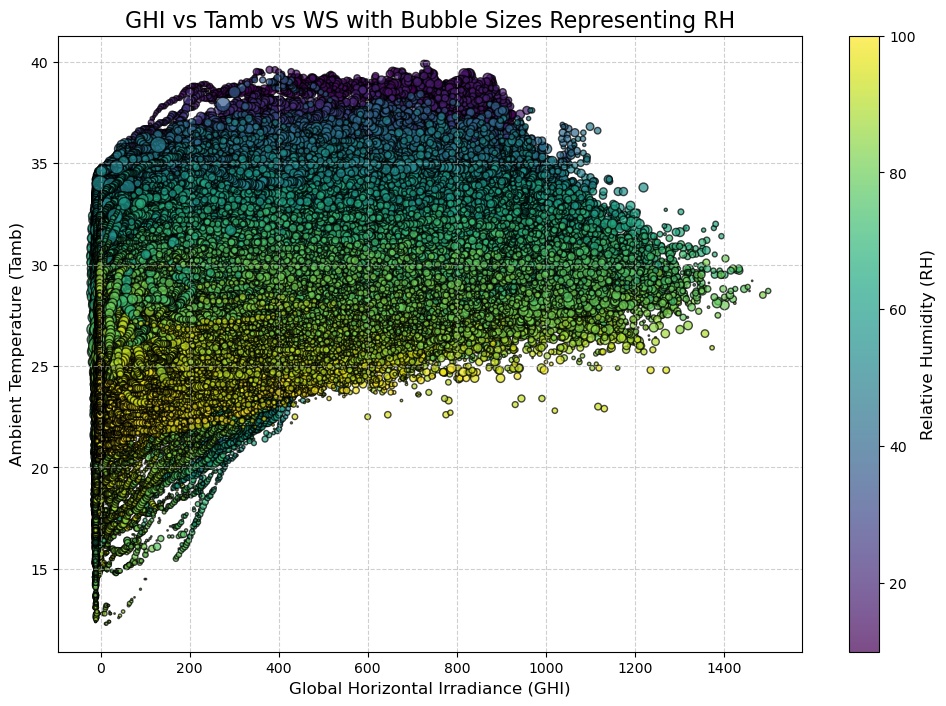

In [48]:
# Define the variables to plot
x = df['GHI']     # X-axis: Global Horizontal Irradiance
y = df['Tamb']    # Y-axis: Ambient Temperature
bubble_size = df['WS']  # Bubble size: Wind Speed
color = df['RH']  # Bubble color: Relative Humidity (RH)

# Plot the bubble chart
plt.figure(figsize=(12, 8))
bubble = plt.scatter(
    x, y, 
    s=bubble_size * 10,  # Scale bubble size for better visibility
    c=color,             # Use RH or BP for color mapping
    cmap='viridis',      # Color map for RH
    alpha=0.7,           # Transparency
    edgecolor='black'    # Bubble edges
)

# Add color bar for reference
color_bar = plt.colorbar(bubble)
color_bar.set_label('Relative Humidity (RH)', fontsize=12)

# Add labels and title
plt.title('GHI vs Tamb vs WS with Bubble Sizes Representing RH', fontsize=16)
plt.xlabel('Global Horizontal Irradiance (GHI)', fontsize=12)
plt.ylabel('Ambient Temperature (Tamb)', fontsize=12)

# Add grid
plt.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.show()